### **IMPORTING LIBRARIES**

In [170]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_recall_curve, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

## **DATA PRE-PROCESSING**

In [171]:
# Loading the dataset
dataset = pd.read_excel('Credit Card Default Dataset.xls')

In [172]:
# Printing the dataset
print(dataset)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  B

In [173]:
# Distribution of data
dataset.shape

(30000, 25)

In [174]:
# Return the first 5 values
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [175]:
# Description of the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [176]:
# Dropping the ID column as it is irrelavant
dataset = dataset.drop('ID', axis=1)

In [177]:
# Renaming the columns to ensure quality across the dataset
dataset.rename(columns={'PAY_0':'PAY_1'},inplace=True)
dataset.rename(columns={'default payment next month':'Default_pay'},inplace=True)

In [178]:
# Rechecking the dataset after renaming columns
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [179]:
# Checking of Missing values
dataset.isna().sum()

LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
Default_pay    0
dtype: int64

In [180]:
# Check the count of unique values w.r.t SEX variable
dataset['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

In [181]:
# Check the count of unique values w.r.t MARRIAGE variable
dataset['MARRIAGE'].value_counts(dropna=False)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [182]:
# Check the count of unique values w.r.t EDUCATION variable
dataset['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='Default_pay', ylabel='count'>

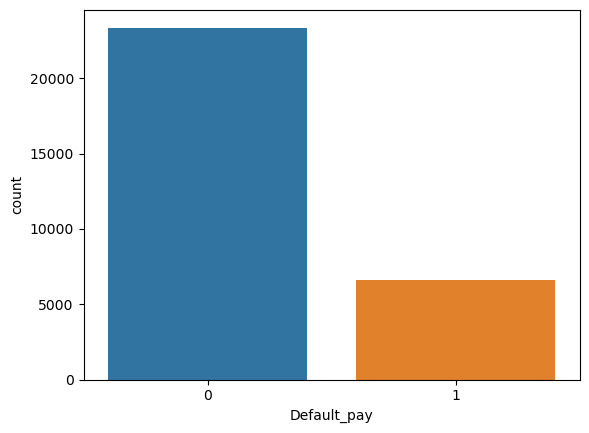

In [183]:
# Create a countplot to check the unique values in the Default variable
sns.countplot(x="Default_pay", data = dataset)

In [184]:
# Calculates the number of unique instances in the dataset where the column "Default_pay" has a value of 0 and 1 
Count_No_Default = len(dataset[dataset["Default_pay"]==0])
Count_Yes_Default = len(dataset[dataset["Default_pay"]==1])

In [185]:
# Calculates the count of Non-Default customers in the Default Pay column
Count_No_Default

23364

In [186]:
# Calculates the count of Default customers in the Default Pay column
Count_Yes_Default

6636

In [187]:
# Visualization of Default Pay column in the form of pie-chart
labels=["Not Default","Default"]

fraud_or_not = dataset["Default_pay"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=dataset['Default_pay'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Default vs Not Default Transactions")
fig.show()

## **FEATURE ANALYSIS**

<AxesSubplot:>

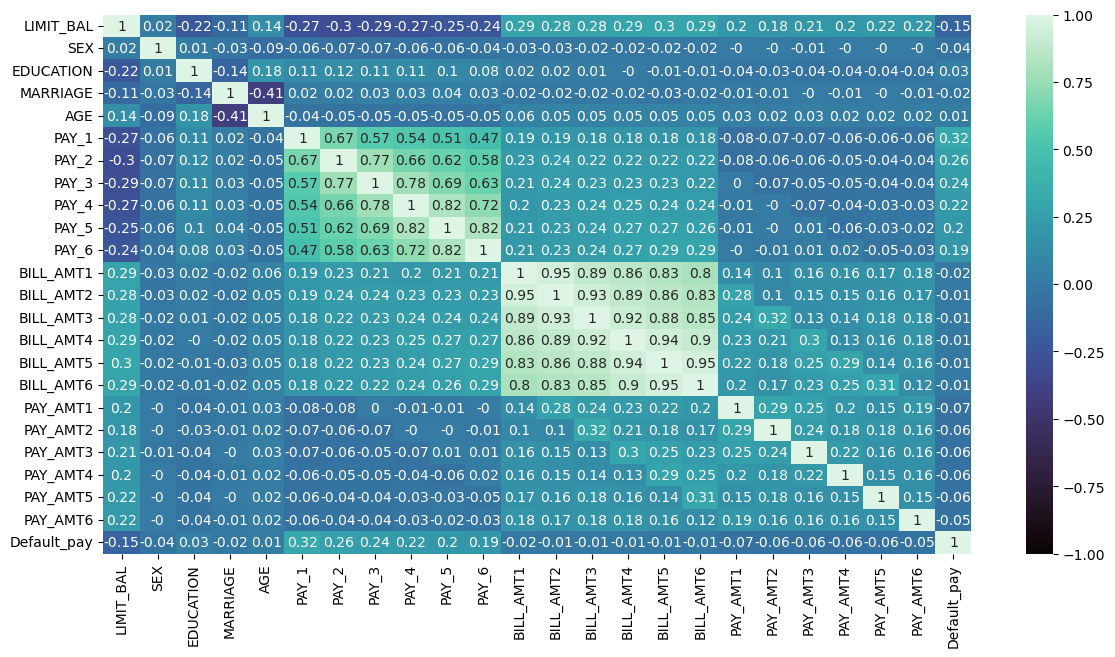

In [188]:
# Heatmap Correlation between features of the Dataset
fig, ax = plt.subplots(figsize = (14,7))
corr = dataset.corr().round(2)
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='mako')

<AxesSubplot:>

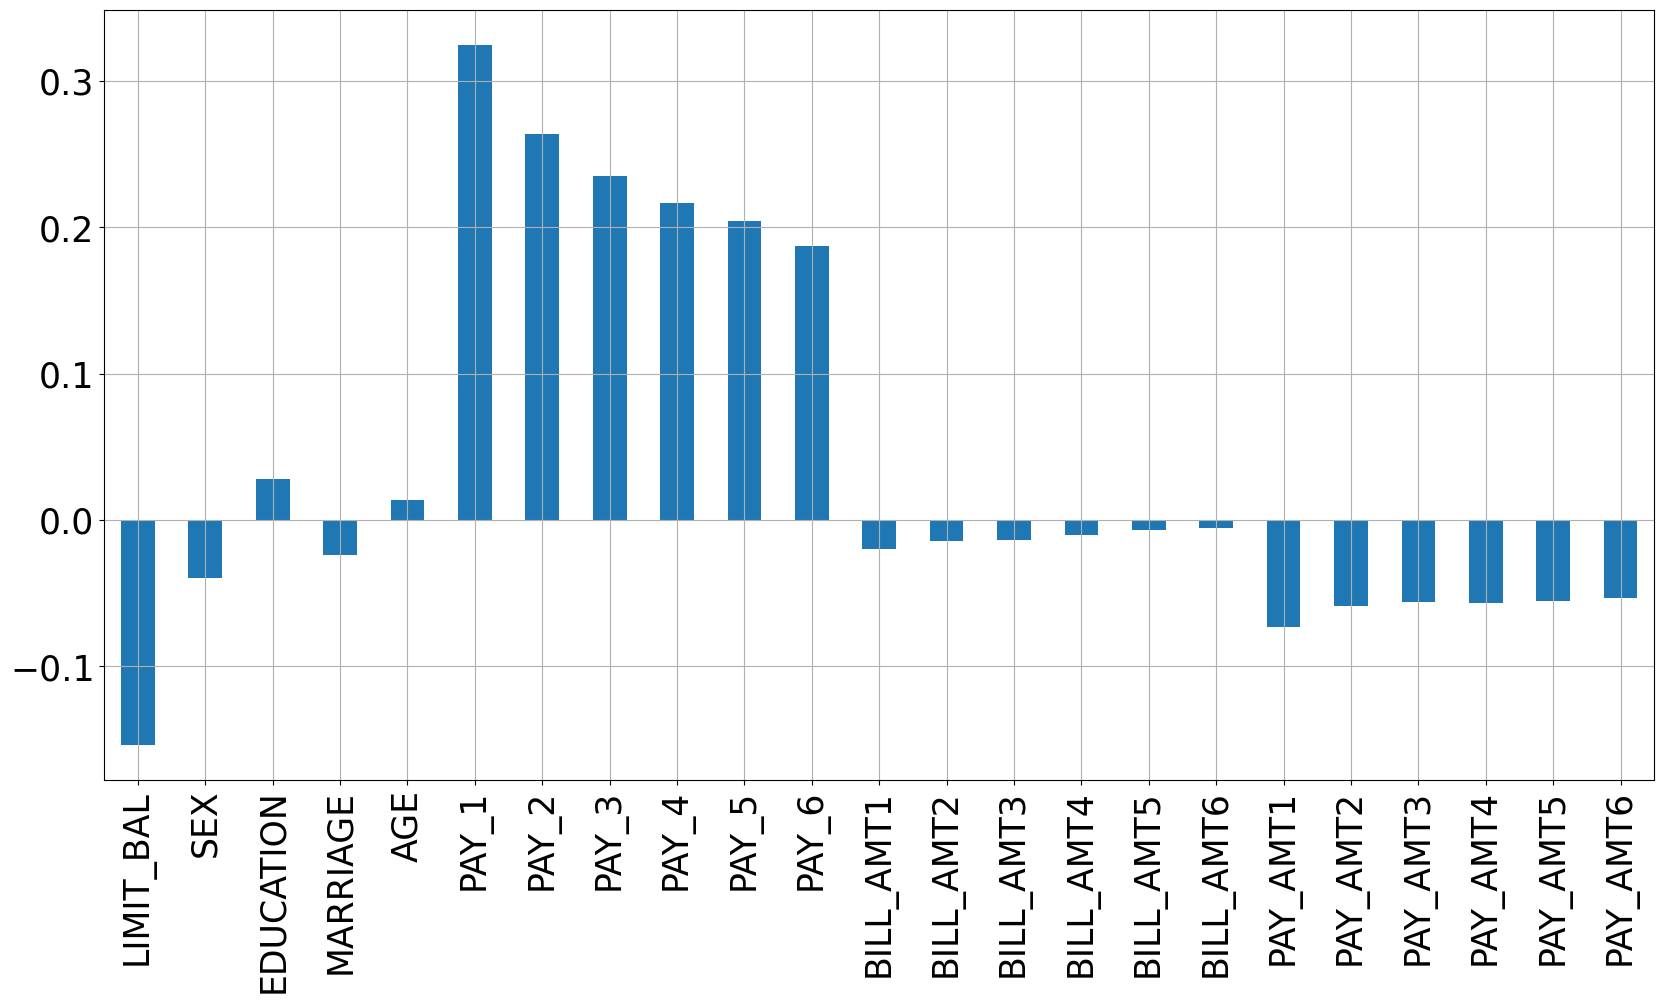

In [341]:
# Observing Correlation between features of the Dataset
X = dataset.drop(['Default_pay'],axis=1)
X.corrwith(dataset['Default_pay']).plot.bar(figsize = (20, 10), 
                                        fontsize = 25,rot = 90, grid = True)

In [190]:
# Drop columns which are highly correlated with each other but less correalted with the target variable
drop_list1 = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
X_1 = X.drop(drop_list1,axis = 1 ) 
X_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679


<AxesSubplot:>

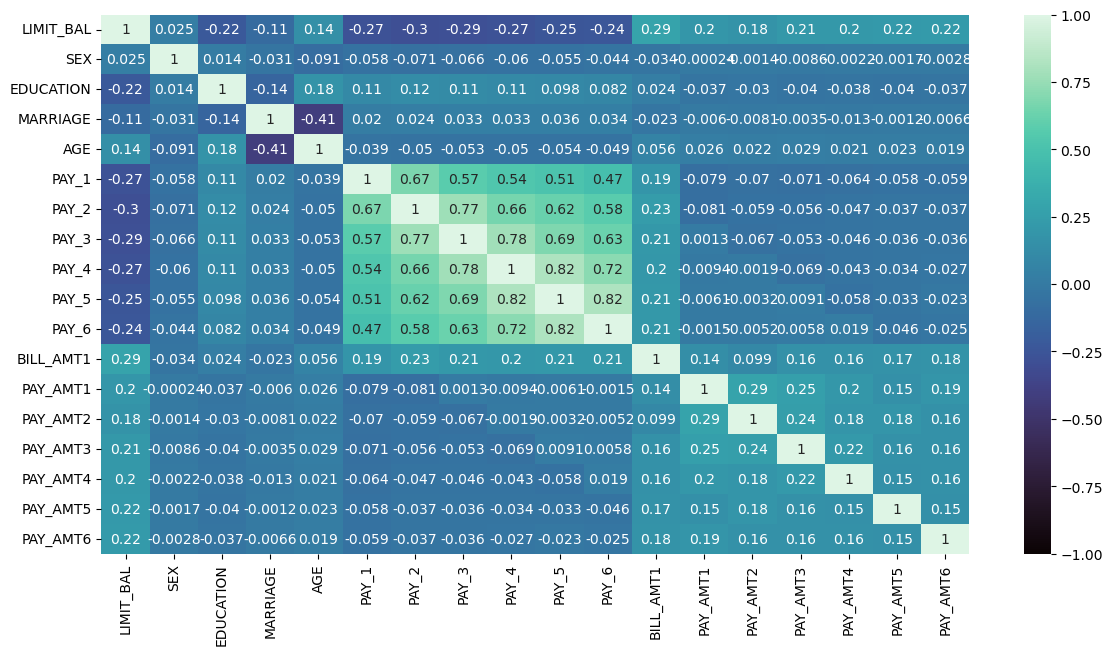

In [191]:
# Updated Heatmap Features Correlation after dropping columns
fig, ax = plt.subplots(figsize = (14,7))
corr = dataset.corr().round(2)
sns.heatmap(X_1.corr(), annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='mako')

## **DATA CLEANING**

In [192]:
# Assigning the values of 0,5,6 categories to 4 (others)categort since we do not have description for 0,5,6
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)

fil = (X_1['EDUCATION'] == 5) | (X_1['EDUCATION'] == 6) | (X_1['EDUCATION'] == 0)
X_1.loc[fil, 'EDUCATION'] = 4
X_1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [193]:
 #Assigning the values of 0 category to 3 (others)category since we do not have description for 0
#MARRIAGE: Marital status (1=married, 2=single, 3=others)

X_1.loc[X_1['MARRIAGE']==0, 'MARRIAGE'] = 3
X_1['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [194]:
# Check the udpated dataset
X_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679


## **FEATURE ENGINEERING**

In [ ]:
# One Hot encoding for categorical variable using pandas library
cat_columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   'PAY_5','PAY_6']
X_1[cat_columns] = X_1[cat_columns].astype(str)
X_1 = pd.get_dummies(X_1,columns=cat_columns,drop_first=True)
pd.set_option('display.max_columns', None)
X_1.head()

In [196]:
# Convert the columns to lowercase
X_1.columns = X_1.columns.map(str.lower)

In [197]:
# Feature Scaling of Numerical Attributes
columns_to_normalization = ['limit_bal', 'age', 'bill_amt1', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
X_1[columns_to_normalization] = X_1[columns_to_normalization].apply(lambda x : (x-np.mean(x))/np.std(x))

In [199]:
X_1.head()

,limit_bal,age,bill_amt1,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex_2,education_2,education_3,education_4,marriage_2,marriage_3,pay_1_-2,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay_2_-2,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_2_4,pay_2_5,pay_2_6,pay_2_7,pay_2_8,pay_3_-2,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_3_4,pay_3_5,pay_3_6,pay_3_7,pay_3_8,pay_4_-2,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_4_4,pay_4_5,pay_4_6,pay_4_7,pay_4_8,pay_5_-2,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8,pay_6_-2,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,-1.136720,-1.246020,-0.642501,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-0.365981,-1.029047,-0.659219,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.597202,-0.161156,-0.298560,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## **MODEL TRAINING AND TESTING**

In [200]:
# Dataset split into dependent and independent feature
X = X_1
y = dataset['Default_pay']

In [201]:
# Dataset split into train and test set, allocate 70% to train set and 30% to test set
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

In [202]:
# Return of Independent Train set Data
print(X_train)

       limit_bal       age  bill_amt1  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
28465   0.558907  0.489762  -0.695642 -0.341942 -0.256990 -0.296801 -0.308063   
27622  -0.905498 -1.354506  -0.649060 -0.188105 -0.156254 -0.024177  0.318138   
28376  -0.905498  0.055816  -0.068179 -0.341942 -0.053001 -0.296801 -0.180141   
10917   0.250611  2.008570   0.800733 -0.341942 -0.256990 -0.296801 -0.308063   
27234   0.558907 -0.052670  -0.668155 -0.220164  0.689909 -0.233189  0.549469   
...          ...       ...        ...       ...       ...       ...       ...   
29802  -0.905498 -0.378129   0.016998 -0.221191 -0.126784 -0.206438 -0.303467   
5390    0.250611  0.164303   1.438286  0.473128  0.003422 -0.296801  0.170684   
860    -0.905498 -1.029047  -0.695642 -0.341942 -0.256990 -0.296801 -0.308063   
15795  -0.751350 -1.137534   0.308492 -0.160815 -0.170186 -0.041216 -0.231463   
23654  -0.057685  0.055816  -0.695913 -0.341942 -0.098139 -0.118744 -0.202738   

       pay_amt5  pay_amt6  

In [203]:
# # Return of Dependent Train set Data
print(X_test)

       limit_bal       age  bill_amt1  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
2308   -1.059646 -1.137534  -0.575264 -0.251378 -0.170186 -0.211606 -0.212313   
22404  -0.134759 -1.029047   1.161310 -0.071097 -0.073183 -0.117267 -0.139097   
23397  -0.751350 -0.378129   0.256655 -0.195169 -0.121923 -0.126411 -0.152438   
25058  -0.288907  1.466139  -0.414823 -0.244737 -0.178519  0.101571 -0.306339   
2664   -0.905498  0.055816   0.584028 -0.221191 -0.191887 -0.240005 -0.193163   
...          ...       ...        ...       ...       ...       ...       ...   
3941    1.869164 -0.161156  -0.695642  0.480433 -0.256990 -0.296801 -0.308063   
17854   0.327685 -0.920561  -0.117313  0.141063 -0.039980 -0.069615 -0.116564   
95     -0.597202 -0.052670   0.441391 -0.123322 -0.100873 -0.229838 -0.237080   
6279    0.404759  0.055816   1.158866 -0.034026 -0.032906 -0.001686  0.034848   
26428   0.635981  0.055816  -0.661582 -0.101768  0.027727 -0.044738 -0.032879   

       pay_amt5  pay_amt6  

In [204]:
# Return of Independent Test set Data
print(y_train)

28465    1
27622    0
28376    0
10917    0
27234    0
        ..
29802    0
5390     1
860      0
15795    1
23654    1
Name: Default_pay, Length: 21000, dtype: int64


In [205]:
# Return of Dependent Test set Data
print(y_test)

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
3941     1
17854    0
95       0
6279     0
26428    0
Name: Default_pay, Length: 9000, dtype: int64


## **CROSS-VALIDATION**

In [206]:
# Cross Validation using 5 Folds
skfold = StratifiedKFold(n_splits=5)


## ** CLASS IMBALANCE TECHNIQUES TO BALANCE THE DATASET

SMOTE

In [207]:
print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()

X_smote,y_smote= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_smote))

Before oversampling:  Counter({0: 16324, 1: 4676})
After oversampling:  Counter({1: 16324, 0: 16324})


RANDOM UNDERSAMPLING

In [208]:
print("Before Undersampling: ",Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

print("After Undersampling: ",Counter(y_under))

Before Undersampling:  Counter({0: 16324, 1: 4676})
After Undersampling:  Counter({0: 4676, 1: 4676})


RANDOM OVERSAMPLING

In [209]:
print("Before Oversampling: ",Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

print("After Oversampling: ",Counter(y_over))

Before Oversampling:  Counter({0: 16324, 1: 4676})
After Oversampling:  Counter({1: 16324, 0: 16324})


## ** GRIDSEARCHCV W.R.T EACH CLASS IMBALANCE METHOD

GRIDSEARCHCV (UNDERSAMPLING)

In [40]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=skfold, scoring='recall')
grid_tree = grid_tree.fit(X_under, y_under.ravel())
tree_accuracy = grid_tree.best_score_
tree_clf = grid_tree.best_params_
print('DecisionTree GridSearchCV Accuracy: ', tree_accuracy)
print('DecisionTree Best Parameters: ', tree_clf)
print("--------------------------------------------------------------------------------------------")

# Random Forest
random_params = {"criterion": ["gini", "entropy"], 'n_estimators':[100, 123, 145]}
grid_random = GridSearchCV(RandomForestClassifier(), random_params, cv=skfold, scoring='recall')
grid_random = grid_random.fit(X_under, y_under.ravel())
random_accuracy = grid_random.best_score_
random = grid_random.best_params_
print('Random Forest GridSearchCV Accuracy: ', random_accuracy)
print('Random Forest Best Parameters: ', random)
print("--------------------------------------------------------------------------------------------")

# Logistic Regression 
log_reg_params = {'solver': ['saga'], 'C': [0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=skfold, scoring='recall')
grid_log_reg = grid_log_reg.fit(X_under, y_under.ravel())
log_accuracy = grid_log_reg.best_score_
log_reg = grid_log_reg.best_params_
print('Logistic Regression GridSearchCV Accuracy: ', log_accuracy)
print('Logistic Regression Best Parameters: ', log_reg)
print("--------------------------------------------------------------------------------------------")

#XGBoost
xb_params = {'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_xb = GridSearchCV(XGBClassifier(), xb_params, cv=skfold, scoring='recall', n_jobs=-1)
grid_xb = grid_xb.fit(X_under, y_under.ravel())
xb_accuracy = grid_xb.best_score_
xb = grid_xb.best_params_
print('XGBoost GridSearchCV Accuracy: ', xb_accuracy)
print('XGBoost Best Parameters: ', xb)
print("--------------------------------------------------------------------------------------------") 

#LightGBM
lgb_params = {'learning_rate': [0.4, 0.2, 0.1], 
                'max_depth': [15, 10, 20],
                'num_leaves': [32,25,40],
                'feature_fraction': [0.8, 0.5, 0.2],
                'subsample': [0.2, 0.5, 0.8, 1]}
grid_lgb = GridSearchCV(LGBMClassifier(), lgb_params, cv=skfold, scoring='recall', n_jobs=-1)
grid_lgb = grid_lgb.fit(X_under, y_under.ravel())
lgb_accuracy = grid_lgb.best_score_
lgb = grid_lgb.best_params_
print('LightGBM GridSearchCV Accuracy: ', lgb_accuracy)
print('LightGBM Best Parameters: ', lgb)
print("--------------------------------------------------------------------------------------------")

#Adaptive Boost
ab_params = {'n_estimators':[50, 110, 133],'learning_rate': [1], 'algorithm': ['SAMME', 'SAMME.R']}
grid_ab = GridSearchCV(AdaBoostClassifier(), ab_params, cv=skfold, scoring='recall')
grid_ab = grid_ab.fit(X_under, y_under.ravel())
ab_accuracy = grid_ab.best_score_
ab = grid_ab.best_params_
print('Adaptive Boost GridSearchCV Accuracy: ', ab_accuracy)
print('Adaptive Boost Best Parameters: ', ab)
print("--------------------------------------------------------------------------------------------")

#ExtraTrees
et_params = {"criterion": ["gini", "entropy"], 'n_estimators':[100, 300, 1500], "max_depth": list(range(2,6,1)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_et = GridSearchCV(ExtraTreesClassifier(), et_params, cv=skfold, scoring='recall')
grid_et = grid_et.fit(X_under, y_under.ravel())
et_accuracy = grid_et.best_score_
et = grid_et.best_params_
print('ExtraTrees GridSearchCV Accuracy: ', et_accuracy)
print('ExtraTrees Best Parameters: ', et)

DecisionTree GridSearchCV Accuracy:  0.6229660862013804
DecisionTree Best Parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
--------------------------------------------------------------------------------------------
Random Forest GridSearchCV Accuracy:  0.6514125417066594
Random Forest Best Parameters:  {'criterion': 'gini', 'n_estimators': 145}
--------------------------------------------------------------------------------------------
Logistic Regression GridSearchCV Accuracy:  0.591749165866813
Logistic Regression Best Parameters:  {'C': 0.01, 'solver': 'saga'}
--------------------------------------------------------------------------------------------
XGBoost GridSearchCV Accuracy:  0.6704438045614516
XGBoost Best Parameters:  {'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 150}
--------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be i

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
LightGBM GridSearchCV Accuracy:  0.6730165912518854
LightGBM Best Parameters:  {'feature_fraction': 0.8, 'learning_rate': 0.4, 'max_depth': 20, 'num_leaves': 25, 'subsample': 0.2}
--------------------------------------------------------------------------------------------
Adaptive Boost GridSearchCV Accuracy:  0.6360110151286623
Adaptive Boost Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 110}
--------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fe

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGB

GRIDSEARCHCV (OVERSAMPLING)

In [41]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=skfold, scoring='recall')
grid_tree = grid_tree.fit(X_over, y_over.ravel())
tree_accuracy = grid_tree.best_score_
tree_clf = grid_tree.best_params_
print('DecisionTree GridSearchCV Accuracy: ', tree_accuracy)
print('DecisionTree Best Parameters: ', tree_clf)
print("--------------------------------------------------------------------------------------------")

# Random Forest
random_params = {"criterion": ["gini", "entropy"], 'n_estimators':[100, 123, 145]}
grid_random = GridSearchCV(RandomForestClassifier(), random_params, cv=skfold, scoring='recall')
grid_random = grid_random.fit(X_over, y_over.ravel())
random_accuracy = grid_random.best_score_
random = grid_random.best_params_
print('Random Forest GridSearchCV Accuracy: ', random_accuracy)
print('Random Forest Best Parameters: ', random)
print("--------------------------------------------------------------------------------------------")

# Logistic Regression 
log_reg_params = {'solver': ['saga'], 'C': [0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=skfold, scoring='recall')
grid_log_reg = grid_log_reg.fit(X_over, y_over.ravel())
log_accuracy = grid_log_reg.best_score_
log_reg = grid_log_reg.best_params_
print('Logistic Regression GridSearchCV Accuracy: ', log_accuracy)
print('Logistic Regression Best Parameters: ', log_reg)
print("--------------------------------------------------------------------------------------------")

#XGBoost
xb_params = {'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_xb = GridSearchCV(XGBClassifier(), xb_params, cv=skfold, scoring='recall', n_jobs=-1)
grid_xb = grid_xb.fit(X_over, y_over.ravel())
xb_accuracy = grid_xb.best_score_
xb = grid_xb.best_params_
print('XGBoost GridSearchCV Accuracy: ', xb_accuracy)
print('XGBoost Best Parameters: ', xb)
print("--------------------------------------------------------------------------------------------") 

#LightGBM
lgb_params = {'learning_rate': [0.4, 0.2, 0.1], 
                'max_depth': [15, 10, 20],
                'num_leaves': [32,25,40],
                'feature_fraction': [0.8, 0.5, 0.2],
                'subsample': [0.2, 0.5, 0.8, 1]}
grid_lgb = GridSearchCV(LGBMClassifier(), lgb_params, cv=skfold, scoring='recall', n_jobs=-1)
grid_lgb = grid_lgb.fit(X_over, y_over.ravel())
lgb_accuracy = grid_lgb.best_score_
lgb = grid_lgb.best_params_
print('LightGBM GridSearchCV Accuracy: ', lgb_accuracy)
print('LightGBM Best Parameters: ', lgb)
print("--------------------------------------------------------------------------------------------")

#Adaptive Boost
ab_params = {'n_estimators':[50, 110, 133],'learning_rate': [1], 'algorithm': ['SAMME', 'SAMME.R']}
grid_ab = GridSearchCV(AdaBoostClassifier(), ab_params, cv=skfold, scoring='recall')
grid_ab = grid_ab.fit(X_over, y_over.ravel())
ab_accuracy = grid_ab.best_score_
ab = grid_ab.best_params_
print('Adaptive Boost GridSearchCV Accuracy: ', ab_accuracy)
print('Adaptive Boost Best Parameters: ', ab)
print("--------------------------------------------------------------------------------------------")

#ExtraTrees
et_params = {"criterion": ["gini", "entropy"], 'n_estimators':[100, 300, 1500], "max_depth": list(range(2,6,1)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_et = GridSearchCV(ExtraTreesClassifier(), et_params, cv=skfold, scoring='recall')
grid_et = grid_et.fit(X_over, y_over.ravel())
et_accuracy = grid_et.best_score_
et = grid_et.best_params_
print('ExtraTrees GridSearchCV Accuracy: ', et_accuracy)
print('ExtraTrees Best Parameters: ', et)

DecisionTree GridSearchCV Accuracy:  0.438127721226316
DecisionTree Best Parameters:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5}
--------------------------------------------------------------------------------------------
Random Forest GridSearchCV Accuracy:  0.9820520673813171
Random Forest Best Parameters:  {'criterion': 'entropy', 'n_estimators': 123}
--------------------------------------------------------------------------------------------
Logistic Regression GridSearchCV Accuracy:  0.5881525500705642
Logistic Regression Best Parameters:  {'C': 0.01, 'solver': 'saga'}
--------------------------------------------------------------------------------------------
XGBoost GridSearchCV Accuracy:  0.9781927116175719
XGBoost Best Parameters:  {'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 200}
--------------------------------------------------------------------------------------------
LightGBM GridSearchCV Accuracy:  0.8831175682370956
LightGBM Best Paramet

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

ExtraTrees GridSearchCV Accuracy:  0.5391454223343242
ExtraTrees Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}


GRIDSEARCHCV(SMOTE)

In [42]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=skfold, scoring='recall')
grid_tree = grid_tree.fit(X_smote, y_smote.ravel())
tree_accuracy = grid_tree.best_score_
tree_clf = grid_tree.best_params_
print('DecisionTree GridSearchCV Accuracy: ', tree_accuracy)
print('DecisionTree Best Parameters: ', tree_clf)
print("--------------------------------------------------------------------------------------------")

# Random Forest
random_params = {"criterion": ["gini", "entropy"], 'n_estimators':[100, 123, 145]}
grid_random = GridSearchCV(RandomForestClassifier(), random_params, cv=skfold, scoring='recall')
grid_random = grid_random.fit(X_smote, y_smote.ravel())
random_accuracy = grid_random.best_score_
random = grid_random.best_params_
print('Random Forest GridSearchCV Accuracy: ', random_accuracy)
print('Random Forest Best Parameters: ', random)
print("--------------------------------------------------------------------------------------------")

# Logistic Regression 
log_reg_params = {'solver': ['saga'], 'C': [0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=skfold, scoring='recall')
grid_log_reg = grid_log_reg.fit(X_smote, y_smote.ravel())
log_accuracy = grid_log_reg.best_score_
log_reg = grid_log_reg.best_params_
print('Logistic Regression GridSearchCV Accuracy: ', log_accuracy)
print('Logistic Regression Best Parameters: ', log_reg)
print("--------------------------------------------------------------------------------------------")

#XGBoost
xb_params = {'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_xb = GridSearchCV(XGBClassifier(), xb_params, cv=skfold, scoring='recall', n_jobs=-1)
grid_xb = grid_xb.fit(X_smote, y_smote.ravel())
xb_accuracy = grid_xb.best_score_
xb = grid_xb.best_params_
print('XGBoost GridSearchCV Accuracy: ', xb_accuracy)
print('XGBoost Best Parameters: ', xb)
print("--------------------------------------------------------------------------------------------") 

#LightGBM
lgb_params = {'learning_rate': [0.4, 0.2, 0.1], 
                'max_depth': [15, 10, 20],
                'num_leaves': [32,25,40],
                'feature_fraction': [0.8, 0.5, 0.2],
                'subsample': [0.2, 0.5, 0.8, 1]}
grid_lgb = GridSearchCV(LGBMClassifier(), lgb_params, cv=skfold, scoring='recall', n_jobs=-1)
grid_lgb = grid_lgb.fit(X_smote, y_smote.ravel())
lgb_accuracy = grid_lgb.best_score_
lgb = grid_lgb.best_params_
print('LightGBM GridSearchCV Accuracy: ', lgb_accuracy)
print('LightGBM Best Parameters: ', lgb)
print("--------------------------------------------------------------------------------------------")

#Adaptive Boost
ab_params = {'n_estimators':[50, 110, 133],'learning_rate': [1], 'algorithm': ['SAMME', 'SAMME.R']}
grid_ab = GridSearchCV(AdaBoostClassifier(), ab_params, cv=skfold, scoring='recall')
grid_ab = grid_ab.fit(X_smote, y_smote.ravel())
ab_accuracy = grid_ab.best_score_
ab = grid_ab.best_params_
print('Adaptive Boost GridSearchCV Accuracy: ', ab_accuracy)
print('Adaptive Boost Best Parameters: ', ab)
print("--------------------------------------------------------------------------------------------")

#ExtraTrees
et_params = {"criterion": ["gini", "entropy"], 'n_estimators':[100, 300, 1500], "max_depth": list(range(2,6,1)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_et = GridSearchCV(ExtraTreesClassifier(), et_params, cv=skfold, scoring='recall')
grid_et = grid_et.fit(X_smote, y_smote.ravel())
et_accuracy = grid_et.best_score_
et = grid_et.best_params_
print('ExtraTrees GridSearchCV Accuracy: ', et_accuracy)
print('ExtraTrees Best Parameters: ', et)

DecisionTree GridSearchCV Accuracy:  0.4196877908897096
DecisionTree Best Parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
--------------------------------------------------------------------------------------------
Random Forest GridSearchCV Accuracy:  0.8508982674233552
Random Forest Best Parameters:  {'criterion': 'entropy', 'n_estimators': 145}
--------------------------------------------------------------------------------------------
Logistic Regression GridSearchCV Accuracy:  0.6349543021649702
Logistic Regression Best Parameters:  {'C': 100, 'solver': 'saga'}
--------------------------------------------------------------------------------------------
XGBoost GridSearchCV Accuracy:  0.8086973771131729
XGBoost Best Parameters:  {'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 50}
--------------------------------------------------------------------------------------------
LightGBM GridSearchCV Accuracy:  0.793934874485782
LightGBM Best Parameters: 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

ExtraTrees GridSearchCV Accuracy:  0.5516986645347266
ExtraTrees Best Parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 6, 'n_estimators': 100}


## **MODEL TRAINING AND TESTING**

DECISION TREE

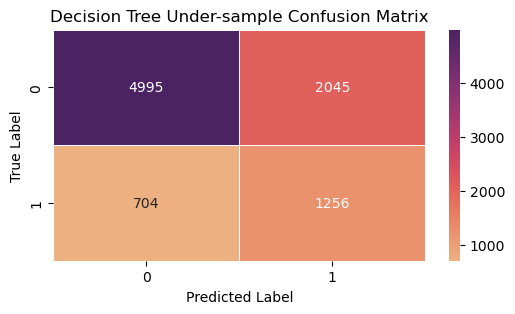

Average 5-Fold CV Score: 0.6818

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      7040
           1       0.38      0.64      0.48      1960

    accuracy                           0.69      9000
   macro avg       0.63      0.68      0.63      9000
weighted avg       0.77      0.69      0.72      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167


In [317]:
# DecisionTree - Undersampling
dt_under = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5)

#Fit the classifier to the training data
dt_under.fit(X_under,y_under)

#Generate predictions for test data
pred_dt_under= dt_under.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_dt_under)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Decision Tree Under-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Perform Cross Validation of the model and returns average 5 Fold Cross Validation Score
cv_scores = cross_val_score(dt_under, X_under, y_under, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_dt_under))

# Calculates various evaluation metrics to assess the performance of the model
roc=roc_auc_score(y_test, pred_dt_under)
acc = accuracy_score(y_test, pred_dt_under)
prec = precision_score(y_test, pred_dt_under)
rec = recall_score(y_test, pred_dt_under)
f1 = f1_score(y_test, pred_dt_under)

# Returns the results of various evaluation metrics of the model in the tabular form
results = pd.DataFrame([['Decision Tree - Undersampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results


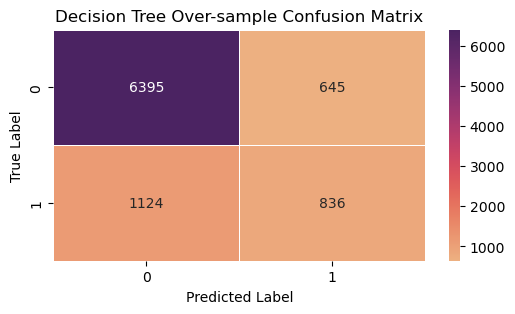

Average 5-Fold CV Score: 0.6739

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7040
           1       0.56      0.43      0.49      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.67      0.68      9000
weighted avg       0.79      0.80      0.79      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456


In [318]:
# DecisionTree - Oversampling
dt_over = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf = 5)

dt_over.fit(X_over,y_over)

pred_dt_over= dt_over.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_dt_over)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap='flare', annot=True, linewidths=0.5, fmt='g')
plt.title("Decision Tree Over-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(dt_over, X_over, y_over, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_dt_over))

roc=roc_auc_score(y_test, pred_dt_over)
acc = accuracy_score(y_test, pred_dt_over)
prec = precision_score(y_test, pred_dt_over)
rec = recall_score(y_test, pred_dt_over)
f1 = f1_score(y_test, pred_dt_over)

# 
model_results = pd.DataFrame([['Decision Tree - Overersampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results


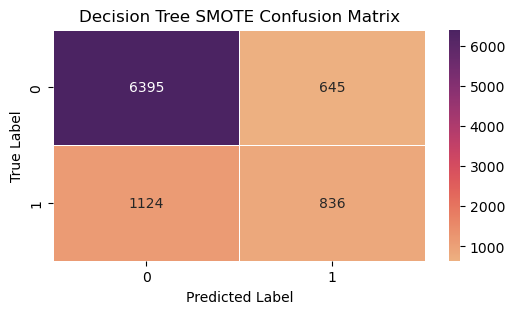

Average 5-Fold CV Score: 0.6646

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7040
           1       0.56      0.43      0.49      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.67      0.68      9000
weighted avg       0.79      0.80      0.79      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456


In [319]:
# DecisionTree - SMOTE
dt_smote = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 5)

dt_smote.fit(X_smote,y_smote)

pred_dt_smote= dt_smote.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_dt_smote)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Decision Tree SMOTE Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(dt_smote, X_smote, y_smote, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_dt_smote))

roc=roc_auc_score(y_test, pred_dt_smote)
acc = accuracy_score(y_test, pred_dt_smote)
prec = precision_score(y_test, pred_dt_smote)
rec = recall_score(y_test, pred_dt_smote)
f1 = f1_score(y_test, pred_dt_smote)


model_results = pd.DataFrame([['Decision Tree - SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index=True)
results

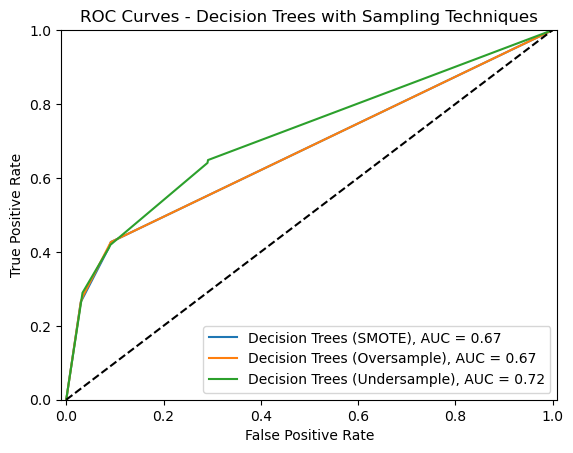

In [320]:
# Decision Trees - ROC-AUC Curve

y_pred_dt_smote = dt_smote.predict_proba(X_test)[:, 1]
fpr_dt_smote, tpr_dt_smote, _ = roc_curve(y_test, y_pred_dt_smote)
auc_dt_smote = roc_auc_score(y_test, y_pred_dt_smote)

y_pred_dt_over = dt_over.predict_proba(X_test)[:, 1]
fpr_dt_over, tpr_dt_over, _ = roc_curve(y_test, y_pred_dt_over)
auc_dt_over = roc_auc_score(y_test, y_pred_dt_over)

y_pred_dt_under = dt_under.predict_proba(X_test)[:, 1]
fpr_dt_under, tpr_dt_under, _ = roc_curve(y_test, y_pred_dt_under)
auc_dt_under = roc_auc_score(y_test, y_pred_dt_under)

# Plot ROC curves
plt.plot(fpr_dt_smote, tpr_dt_smote, label='Decision Trees (SMOTE), AUC = {:.2f}'.format(auc_dt_smote))
plt.plot(fpr_dt_over, tpr_dt_over, label='Decision Trees (Oversample), AUC = {:.2f}'.format(auc_dt_over))
plt.plot(fpr_dt_under, tpr_dt_under, label='Decision Trees (Undersample), AUC = {:.2f}'.format(auc_dt_under))
plt.xlim([-0.01, 1.01])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'k--')  # Baseline ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Decision Trees with Sampling Techniques')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST

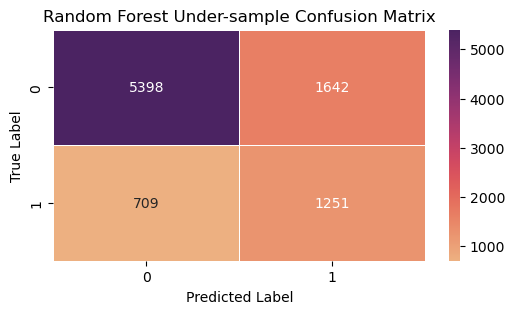

Average 5-Fold CV Score: 0.7062

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7040
           1       0.43      0.64      0.52      1960

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.79      0.74      0.75      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513


In [321]:
# Random Forest - Undersampling
rf_under = RandomForestClassifier(criterion = 'gini', n_estimators = 145)

rf_under.fit(X_under,y_under)

pred_rf_under= rf_under.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_rf_under)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Random Forest Under-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(rf_under, X_under, y_under, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_rf_under))

roc=roc_auc_score(y_test, pred_rf_under)
acc = accuracy_score(y_test, pred_rf_under)
prec = precision_score(y_test, pred_rf_under)
rec = recall_score(y_test, pred_rf_under)
f1 = f1_score(y_test, pred_rf_under)


model_results = pd.DataFrame([['Random Forest - Undersampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

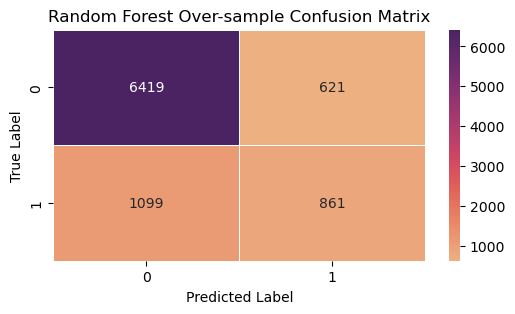

Average 5-Fold CV Score: 0.9391

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7040
           1       0.58      0.44      0.50      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.68      0.69      9000
weighted avg       0.79      0.81      0.80      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538


In [322]:
# Random Forest Oversampling
rf_over = RandomForestClassifier(criterion='entropy', n_estimators=123)

rf_over.fit(X_over,y_over)

pred_rf_over= rf_over.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_rf_over)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Random Forest Over-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(rf_over, X_over, y_over, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_rf_over))

roc=roc_auc_score(y_test, pred_rf_over)
acc = accuracy_score(y_test, pred_rf_over)
prec = precision_score(y_test, pred_rf_over)
rec = recall_score(y_test, pred_rf_over)
f1 = f1_score(y_test, pred_rf_over)


model_results = pd.DataFrame([['Random Forest - Oversampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

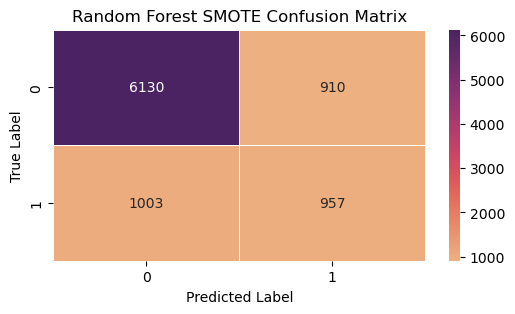

Average 5-Fold CV Score: 0.8548

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7040
           1       0.51      0.49      0.50      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.68      0.68      9000
weighted avg       0.78      0.79      0.79      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502


In [323]:
# Random Forest - SMOTE
rf_smote = RandomForestClassifier(criterion='entropy', n_estimators=145)

rf_smote.fit(X_smote,y_smote)

pred_rf_smote= rf_smote.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_rf_smote)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Random Forest SMOTE Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(rf_smote, X_smote, y_smote, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_rf_smote))

roc=roc_auc_score(y_test, pred_rf_smote)
acc = accuracy_score(y_test, pred_rf_smote)
prec = precision_score(y_test, pred_rf_smote)
rec = recall_score(y_test, pred_rf_smote)
f1 = f1_score(y_test, pred_rf_smote)


model_results = pd.DataFrame([['Random Forest - SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

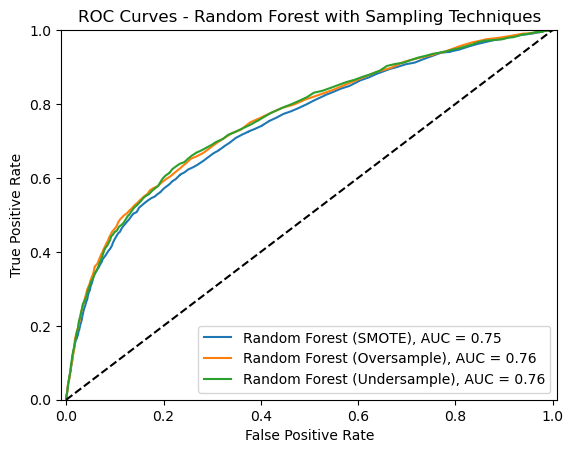

In [324]:
# Random Forest - ROC-AUC Curve
y_pred_rf_smote = rf_smote.predict_proba(X_test)[:, 1]
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_pred_rf_smote)
auc_rf_smote = roc_auc_score(y_test, y_pred_rf_smote)

y_pred_rf_over = rf_over.predict_proba(X_test)[:, 1]
fpr_rf_over, tpr_rf_over, _ = roc_curve(y_test, y_pred_rf_over)
auc_rf_over = roc_auc_score(y_test, y_pred_rf_over)

y_pred_rf_under = rf_under.predict_proba(X_test)[:, 1]
fpr_rf_under, tpr_rf_under, _ = roc_curve(y_test, y_pred_rf_under)
auc_rf_under = roc_auc_score(y_test, y_pred_rf_under)

# Plot ROC curves
plt.plot(fpr_rf_smote, tpr_rf_smote, label='Random Forest (SMOTE), AUC = {:.2f}'.format(auc_rf_smote))
plt.plot(fpr_rf_over, tpr_rf_over, label='Random Forest (Oversample), AUC = {:.2f}'.format(auc_rf_over))
plt.plot(fpr_rf_under, tpr_rf_under, label='Random Forest (Undersample), AUC = {:.2f}'.format(auc_rf_under))
plt.xlim([-0.01, 1.01])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'k--')  # Baseline ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Random Forest with Sampling Techniques')
plt.legend(loc='lower right')
plt.show()

LOGISTIC REGRESSION

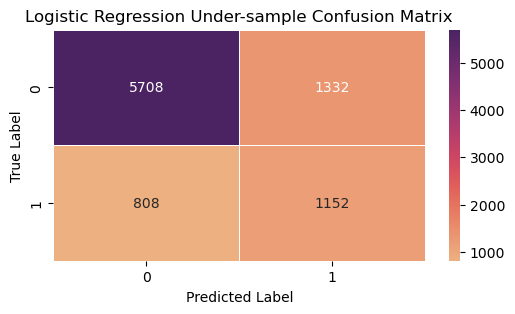

Average 5-Fold CV Score: 0.6988

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7040
           1       0.46      0.59      0.52      1960

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.76      0.77      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275


In [325]:
# Logistic Regrssion - Undersampling
lr_under = LogisticRegression(C = 0.01, solver = 'saga')

lr_under.fit(X_under,y_under)

pred_lr_under= lr_under.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_lr_under)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Logistic Regression Under-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(lr_under, X_under, y_under, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_lr_under))

roc=roc_auc_score(y_test, pred_lr_under)
acc = accuracy_score(y_test, pred_lr_under)
prec = precision_score(y_test, pred_lr_under)
rec = recall_score(y_test, pred_lr_under)
f1 = f1_score(y_test, pred_lr_under)


model_results = pd.DataFrame([['Logistic Regression - Undersampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

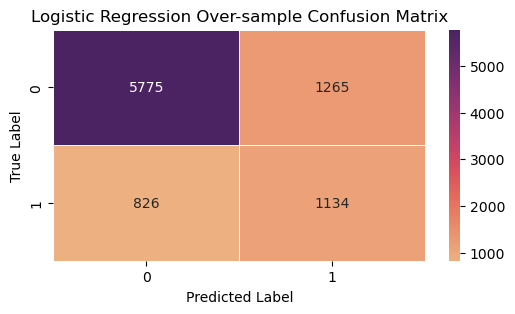

Average 5-Fold CV Score: 0.7068

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7040
           1       0.47      0.58      0.52      1960

    accuracy                           0.77      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.77      0.78      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442


In [326]:
# Logistic Regression - Oversampling
lr_over = LogisticRegression(C = 0.01, solver = 'saga')

lr_over.fit(X_over,y_over)

pred_lr_over= lr_over.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_lr_over)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Logistic Regression Over-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(lr_over, X_over, y_over, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_lr_over))

roc=roc_auc_score(y_test, pred_lr_over)
acc = accuracy_score(y_test, pred_lr_over)
prec = precision_score(y_test, pred_lr_over)
rec = recall_score(y_test, pred_lr_over)
f1 = f1_score(y_test, pred_lr_over)


model_results = pd.DataFrame([['Logistic Regression - Oversampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

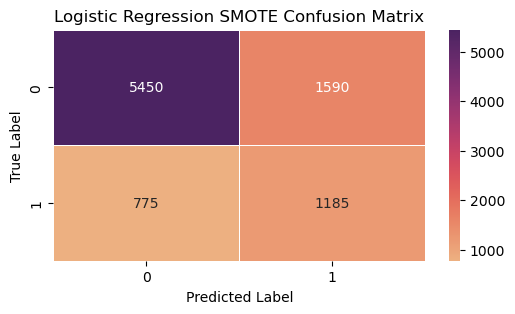

Average 5-Fold CV Score: 0.7062

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7040
           1       0.43      0.60      0.50      1960

    accuracy                           0.74      9000
   macro avg       0.65      0.69      0.66      9000
weighted avg       0.78      0.74      0.75      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370


In [327]:
# Logistic Regression - SMOTE
lr_smote = LogisticRegression(C = 100, solver = 'saga')

lr_smote.fit(X_smote,y_smote)

pred_lr_smote= lr_smote.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_lr_smote)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("Logistic Regression SMOTE Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(lr_smote, X_smote, y_smote, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_lr_smote))

roc=roc_auc_score(y_test, pred_lr_smote)
acc = accuracy_score(y_test, pred_lr_smote)
prec = precision_score(y_test, pred_lr_smote)
rec = recall_score(y_test, pred_lr_smote)
f1 = f1_score(y_test, pred_lr_smote)


model_results = pd.DataFrame([['Logisitic Regression - SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

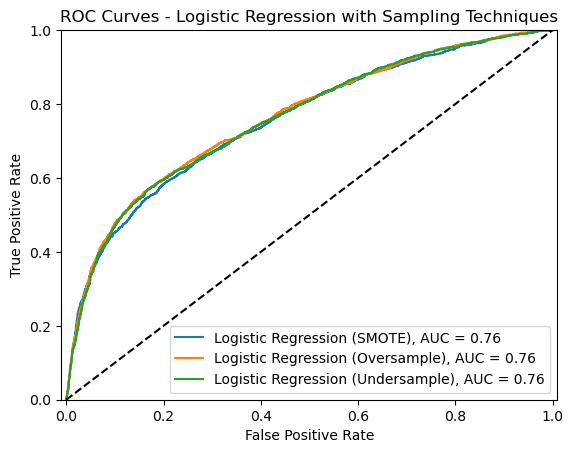

In [328]:
# Logistic Regression - ROC-AUC Curve
y_pred_lr_smote = lr_smote.predict_proba(X_test)[:, 1]
fpr_lr_smote, tpr_lr_smote, _ = roc_curve(y_test, y_pred_lr_smote)
auc_lr_smote = roc_auc_score(y_test, y_pred_lr_smote)

y_pred_lr_over = lr_over.predict_proba(X_test)[:, 1]
fpr_lr_over, tpr_lr_over, _ = roc_curve(y_test, y_pred_lr_over)
auc_lr_over = roc_auc_score(y_test, y_pred_lr_over)

y_pred_lr_under = lr_under.predict_proba(X_test)[:, 1]
fpr_lr_under, tpr_lr_under, _ = roc_curve(y_test, y_pred_lr_under)
auc_lr_under = roc_auc_score(y_test, y_pred_lr_under)

# Plot ROC curves
plt.plot(fpr_lr_smote, tpr_lr_smote, label='Logistic Regression (SMOTE), AUC = {:.2f}'.format(auc_lr_smote))
plt.plot(fpr_lr_over, tpr_lr_over, label='Logistic Regression (Oversample), AUC = {:.2f}'.format(auc_lr_over))
plt.plot(fpr_lr_under, tpr_lr_under, label='Logistic Regression (Undersample), AUC = {:.2f}'.format(auc_lr_under))
plt.xlim([-0.01, 1.01])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'k--')  # Baseline ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Logistic Regression with Sampling Techniques')
plt.legend(loc='lower right')
plt.show()

XGBOOST

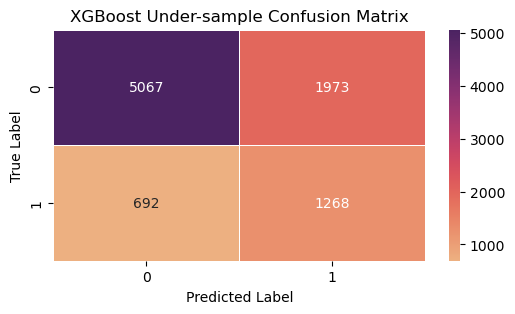

Average 5-Fold CV Score: 0.6916

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      7040
           1       0.39      0.65      0.49      1960

    accuracy                           0.70      9000
   macro avg       0.64      0.68      0.64      9000
weighted avg       0.77      0.70      0.73      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [329]:
# XGB - Undersampling
xgb_under = XGBClassifier(max_depth =  7, min_child_weight =  2, n_estimators = 150)

xgb_under.fit(X_under,y_under)

pred_xgb_under= xgb_under.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_xgb_under)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("XGBoost Under-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(xgb_under, X_under, y_under, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_xgb_under))

roc=roc_auc_score(y_test, pred_xgb_under)
acc = accuracy_score(y_test, pred_xgb_under)
prec = precision_score(y_test, pred_xgb_under)
rec = recall_score(y_test, pred_xgb_under)
f1 = f1_score(y_test, pred_xgb_under)


model_results = pd.DataFrame([['XGBoost - Undersampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

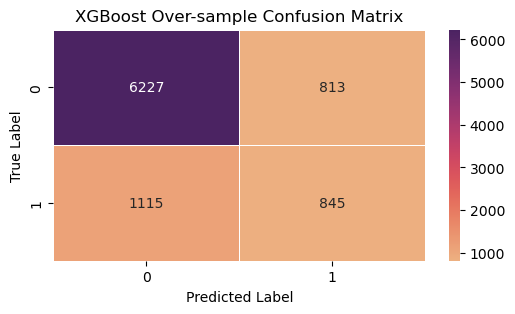

Average 5-Fold CV Score: 0.9227

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      7040
           1       0.51      0.43      0.47      1960

    accuracy                           0.79      9000
   macro avg       0.68      0.66      0.67      9000
weighted avg       0.77      0.79      0.78      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [330]:
# XGB - Oversampling
xgb_over = XGBClassifier(max_depth =  10, min_child_weight =  2, n_estimators = 200)

xgb_over.fit(X_over,y_over)

pred_xgb_over= xgb_over.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_xgb_over)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("XGBoost Over-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(xgb_over, X_over, y_over, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_xgb_over))

roc=roc_auc_score(y_test, pred_xgb_over)
acc = accuracy_score(y_test, pred_xgb_over)
prec = precision_score(y_test, pred_xgb_over)
rec = recall_score(y_test, pred_xgb_over)
f1 = f1_score(y_test, pred_xgb_over)


model_results = pd.DataFrame([['XGBoost - Oversampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

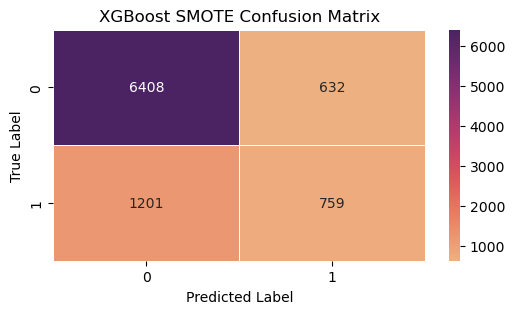

Average 5-Fold CV Score: 0.8544

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7040
           1       0.55      0.39      0.45      1960

    accuracy                           0.80      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.78      0.80      0.78      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [331]:
# XGB - SMOTE
xgb_smote = XGBClassifier(max_depth =  10, min_child_weight =  2, n_estimators = 50)

xgb_smote.fit(X_smote,y_smote)

pred_xgb_smote= xgb_smote.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_xgb_smote)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("XGBoost SMOTE Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(xgb_smote, X_smote, y_smote, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_xgb_smote))

roc=roc_auc_score(y_test, pred_xgb_smote)
acc = accuracy_score(y_test, pred_xgb_smote)
prec = precision_score(y_test, pred_xgb_smote)
rec = recall_score(y_test, pred_xgb_smote)
f1 = f1_score(y_test, pred_xgb_smote)


model_results = pd.DataFrame([['XGBoost - SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

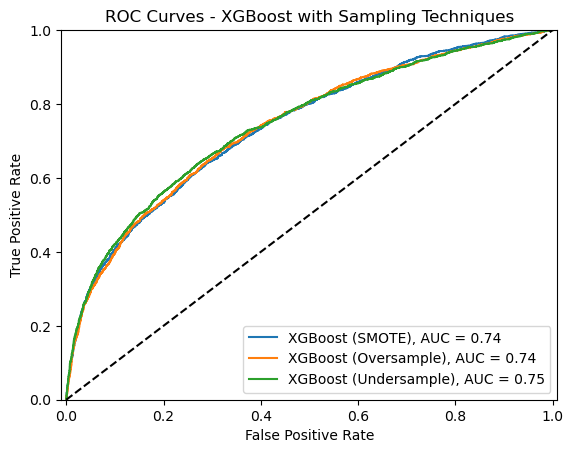

In [332]:
# XGB - ROC-AUC Curve
y_pred_xgb_smote = xgb_smote.predict_proba(X_test)[:, 1]
fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(y_test, y_pred_xgb_smote)
auc_xgb_smote = roc_auc_score(y_test, y_pred_xgb_smote)

y_pred_xgb_over = xgb_over.predict_proba(X_test)[:, 1]
fpr_xgb_over, tpr_xgb_over, _ = roc_curve(y_test, y_pred_xgb_over)
auc_xgb_over = roc_auc_score(y_test, y_pred_xgb_over)

y_pred_xgb_under = xgb_under.predict_proba(X_test)[:, 1]
fpr_xgb_under, tpr_xgb_under, _ = roc_curve(y_test, y_pred_xgb_under)
auc_xgb_under = roc_auc_score(y_test, y_pred_xgb_under)

# Plot ROC curves
plt.plot(fpr_xgb_smote, tpr_xgb_smote, label='XGBoost (SMOTE), AUC = {:.2f}'.format(auc_xgb_smote))
plt.plot(fpr_xgb_over, tpr_xgb_over, label='XGBoost (Oversample), AUC = {:.2f}'.format(auc_xgb_over))
plt.plot(fpr_xgb_under, tpr_xgb_under, label='XGBoost (Undersample), AUC = {:.2f}'.format(auc_xgb_under))
plt.xlim([-0.01, 1.01])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'k--')  # Baseline ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - XGBoost with Sampling Techniques')
plt.legend(loc='lower right')
plt.show()

LIGHTGBM

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


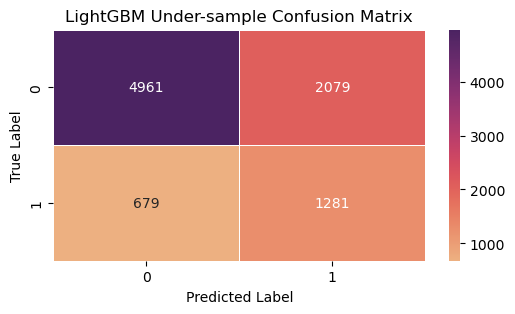

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Average 5-Fold CV Score: 0.6883

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7040
           1       0.38      0.65      0.48      1960

    accuracy                           0.69      9000
   macro avg       0.63      0.68      0.63      9000
weighted avg       0.77      0.

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [333]:
# LightGBM - Undersampling
lgb_under = LGBMClassifier(feature_fraction = 0.8, learning_rate = 0.4, max_depth = 20, 
                           num_leaves = 25, subsample = 0.2)

lgb_under.fit(X_under,y_under)

pred_lgb_under=lgb_under.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_lgb_under)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("LightGBM Under-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(lgb_under, X_under, y_under, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_lgb_under))

roc=roc_auc_score(y_test, pred_lgb_under)
acc = accuracy_score(y_test, pred_lgb_under)
prec = precision_score(y_test, pred_lgb_under)
rec = recall_score(y_test, pred_lgb_under)
f1 = f1_score(y_test, pred_lgb_under)


model_results = pd.DataFrame([['LightGBM - Undersampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


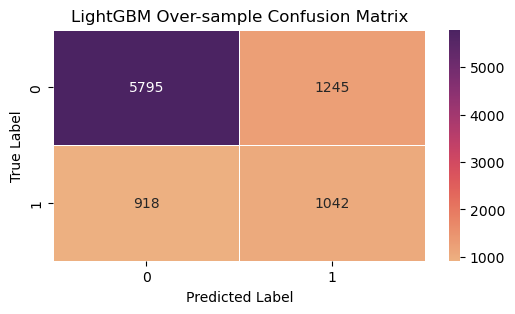

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Average 5-Fold CV Score: 0.8495

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7040
           1       0.46      0.53      0.49      1960

    accuracy                           0.76      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.77      0.

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [334]:
# LightGBM - Oversampling
lgb_over = LGBMClassifier(feature_fraction = 0.8, learning_rate = 0.4, max_depth = 15,
                          num_leaves = 40, subsample = 0.2)

lgb_over.fit(X_over,y_over)

pred_lgb_over=lgb_over.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_lgb_over)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("LightGBM Over-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(lgb_over, X_over, y_over, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_lgb_over))

roc=roc_auc_score(y_test, pred_lgb_over)
acc = accuracy_score(y_test, pred_lgb_over)
prec = precision_score(y_test, pred_lgb_over)
rec = recall_score(y_test, pred_lgb_over)
f1 = f1_score(y_test, pred_lgb_over)


model_results = pd.DataFrame([['LightGBM - Oversampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


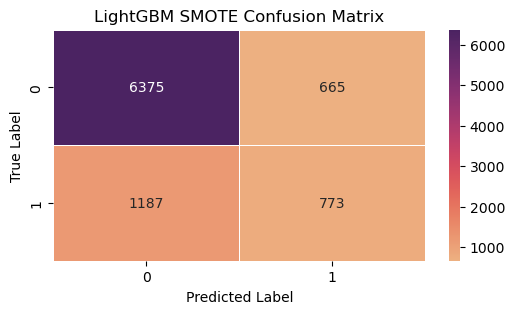

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Average 5-Fold CV Score: 0.8484

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7040
           1       0.54      0.39      0.45      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.78      0.

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [335]:
# LightGBM - SMOTE
lgb_smote = LGBMClassifier(feature_fraction = 0.8, learning_rate = 0.4, max_depth = 15,
                           num_leaves = 40, subsample = 0.2)

lgb_smote.fit(X_smote,y_smote)

pred_lgb_smote=lgb_smote.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_lgb_smote)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("LightGBM SMOTE Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(lgb_smote, X_smote, y_smote, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_lgb_smote))

roc=roc_auc_score(y_test, pred_lgb_smote)
acc = accuracy_score(y_test, pred_lgb_smote)
prec = precision_score(y_test, pred_lgb_smote)
rec = recall_score(y_test, pred_lgb_smote)
f1 = f1_score(y_test, pred_lgb_smote)


model_results = pd.DataFrame([['LightGBM - SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

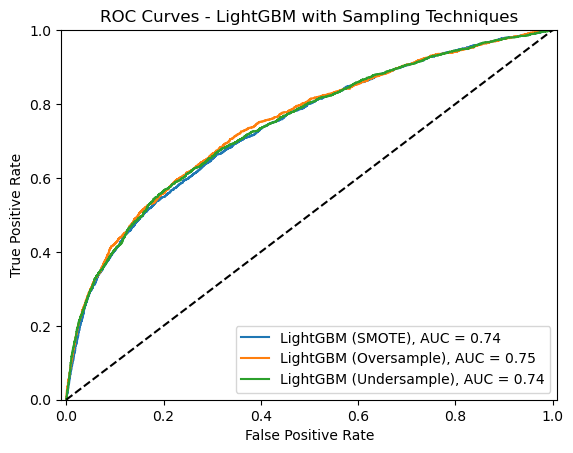

In [336]:
# LightGBM - ROC-AUC Curve
y_pred_lgb_smote = lgb_smote.predict_proba(X_test)[:, 1]
fpr_lgb_smote, tpr_lgb_smote, _ = roc_curve(y_test, y_pred_lgb_smote)
auc_lgb_smote = roc_auc_score(y_test, y_pred_lgb_smote)

y_pred_lgb_over = lgb_over.predict_proba(X_test)[:, 1]
fpr_lgb_over, tpr_lgb_over, _ = roc_curve(y_test, y_pred_lgb_over)
auc_lgb_over = roc_auc_score(y_test, y_pred_lgb_over)

y_pred_lgb_under = lgb_under.predict_proba(X_test)[:, 1]
fpr_lgb_under, tpr_lgb_under, _ = roc_curve(y_test, y_pred_lgb_under)
auc_lgb_under = roc_auc_score(y_test, y_pred_lgb_under)

# Plot ROC curves
plt.plot(fpr_lgb_smote, tpr_lgb_smote, label='LightGBM (SMOTE), AUC = {:.2f}'.format(auc_lgb_smote))
plt.plot(fpr_lgb_over, tpr_lgb_over, label='LightGBM (Oversample), AUC = {:.2f}'.format(auc_lgb_over))
plt.plot(fpr_lgb_under, tpr_lgb_under, label='LightGBM (Undersample), AUC = {:.2f}'.format(auc_lgb_under))
plt.xlim([-0.01, 1.01])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'k--')  # Baseline ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - LightGBM with Sampling Techniques')
plt.legend(loc='lower right')
plt.show()

EXTRATREES

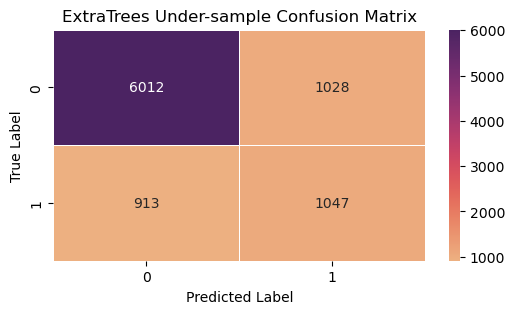

Average 5-Fold CV Score: 0.6996

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7040
           1       0.50      0.53      0.52      1960

    accuracy                           0.78      9000
   macro avg       0.69      0.69      0.69      9000
weighted avg       0.79      0.78      0.79      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [337]:
# ExtraTrees - Undersampling
et_under = ExtraTreesClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 4, n_estimators = 100)

et_under.fit(X_under,y_under)

pred_et_under= et_under.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_et_under)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("ExtraTrees Under-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(et_under, X_under, y_under, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_et_under))

roc=roc_auc_score(y_test, pred_et_under)
acc = accuracy_score(y_test, pred_et_under)
prec = precision_score(y_test, pred_et_under)
rec = recall_score(y_test, pred_et_under)
f1 = f1_score(y_test, pred_et_under)


model_results = pd.DataFrame([['ExtraTrees - Undersampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

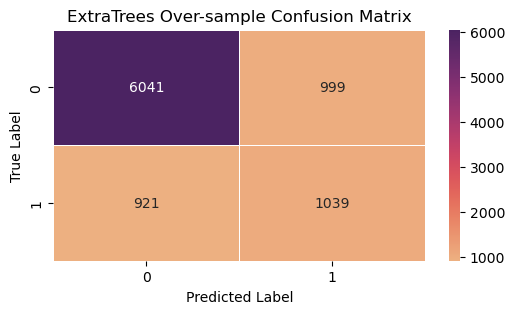

Average 5-Fold CV Score: 0.7006

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7040
           1       0.51      0.53      0.52      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.69      0.69      9000
weighted avg       0.79      0.79      0.79      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [338]:
# ExtraTrees - Oversampling
et_over = ExtraTreesClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 5, n_estimators = 100)

et_over.fit(X_over,y_over)

pred_et_over= et_over.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_et_over)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("ExtraTrees Over-sample Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(et_over, X_over, y_over, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_et_over))

roc=roc_auc_score(y_test, pred_et_over)
acc = accuracy_score(y_test, pred_et_over)
prec = precision_score(y_test, pred_et_over)
rec = recall_score(y_test, pred_et_over)
f1 = f1_score(y_test, pred_et_over)


model_results = pd.DataFrame([['ExtraTrees - Oversampling', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

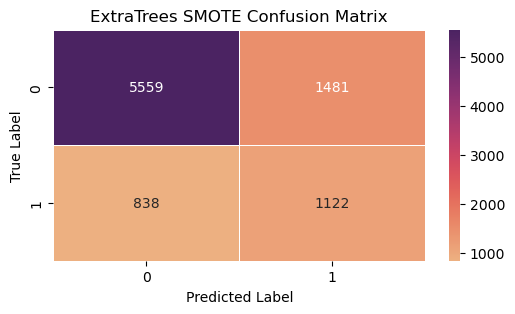

Average 5-Fold CV Score: 0.684

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      7040
           1       0.43      0.57      0.49      1960

    accuracy                           0.74      9000
   macro avg       0.65      0.68      0.66      9000
weighted avg       0.77      0.74      0.75      9000



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree - Undersampling,0.694556,0.380491,0.640816,0.477476,0.675167
1,Decision Tree - Overersampling,0.803444,0.564483,0.426531,0.485905,0.667456
2,Decision Tree - SMOTE,0.803444,0.564483,0.426531,0.485905,0.667456
3,Random Forest - Undersampling,0.738778,0.432423,0.638265,0.515557,0.702513
4,Random Forest - Oversampling,0.808889,0.580972,0.439286,0.500291,0.675538
5,Random Forest - SMOTE,0.787444,0.512587,0.488265,0.500131,0.679502
6,Logistic Regression - Undersampling,0.762222,0.463768,0.587755,0.518452,0.699275
7,Logistic Regression - Oversampling,0.767667,0.472697,0.578571,0.520303,0.699442
8,Logisitic Regression - SMOTE,0.737222,0.427027,0.604592,0.500528,0.689370
9,XGBoost - Undersampling,0.703889,0.391237,0.646939,0.487599,0.683342


In [339]:
# ExtraTrees - SMOTE
et_smote = ExtraTreesClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 6, n_estimators = 100)

et_smote.fit(X_smote,y_smote)

pred_et_smote= et_smote.predict(X_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_et_smote)

# Calculate recall
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cnf_matrix, cmap="flare", annot=True, linewidths=0.5, fmt='g')
plt.title("ExtraTrees SMOTE Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cv_scores = cross_val_score(et_smote, X_smote, y_smote, cv=skfold)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)))

# Print the classification report
print("\n---------- Classification Report ----------")
print(classification_report(y_test, pred_et_smote))

roc=roc_auc_score(y_test, pred_et_smote)
acc = accuracy_score(y_test, pred_et_smote)
prec = precision_score(y_test, pred_et_smote)
rec = recall_score(y_test, pred_et_smote)
f1 = f1_score(y_test, pred_et_smote)


model_results = pd.DataFrame([['ExtraTrees - SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index =True)
results

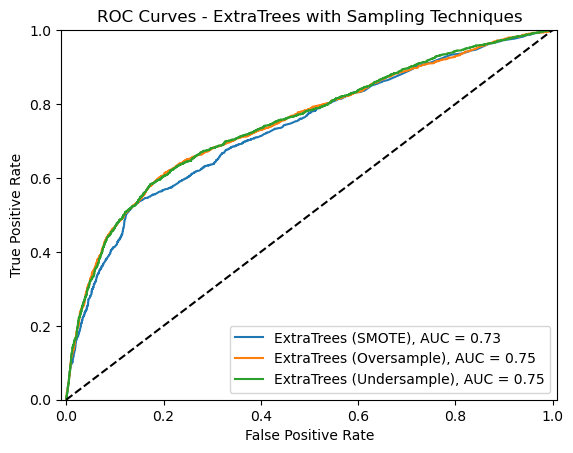

In [340]:
# ExtraTrees - ROC-AUC Curve
y_pred_et_smote = et_smote.predict_proba(X_test)[:, 1]
fpr_et_smote, tpr_et_smote, _ = roc_curve(y_test, y_pred_et_smote)
auc_et_smote = roc_auc_score(y_test, y_pred_et_smote)

y_pred_et_over = et_over.predict_proba(X_test)[:, 1]
fpr_et_over, tpr_et_over, _ = roc_curve(y_test, y_pred_et_over)
auc_et_over = roc_auc_score(y_test, y_pred_et_over)

y_pred_et_under = et_under.predict_proba(X_test)[:, 1]
fpr_et_under, tpr_et_under, _ = roc_curve(y_test, y_pred_et_under)
auc_et_under = roc_auc_score(y_test, y_pred_et_under)

# Plot ROC curves
plt.plot(fpr_et_smote, tpr_et_smote, label='ExtraTrees (SMOTE), AUC = {:.2f}'.format(auc_et_smote))
plt.plot(fpr_et_over, tpr_et_over, label='ExtraTrees (Oversample), AUC = {:.2f}'.format(auc_et_over))
plt.plot(fpr_et_under, tpr_et_under, label='ExtraTrees (Undersample), AUC = {:.2f}'.format(auc_et_under))
plt.xlim([-0.01, 1.01])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'k--')  # Baseline ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - ExtraTrees with Sampling Techniques')
plt.legend(loc='lower right')
plt.show()

## ** COMPARISION OF MODEL ACCURACIES USING PARETO CHART**

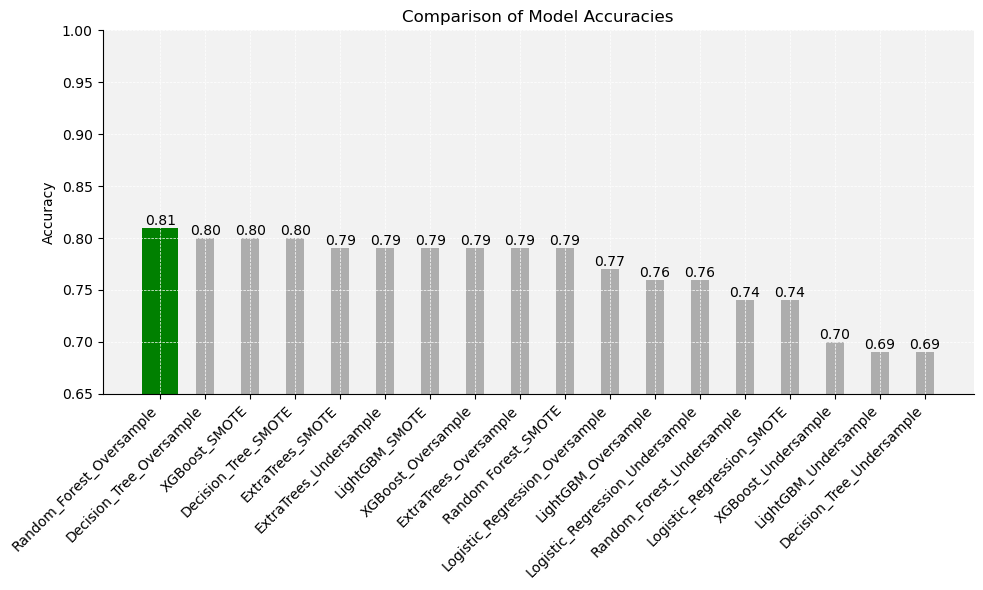

In [263]:
# List of model names
model_names = ['Decision_Tree_Undersample', 'Decision_Tree_Oversample','Decision_Tree_SMOTE',
               'Random_Forest_Undersample', 'Random_Forest_Oversample', 'Random Forest_SMOTE', 
               'Logistic_Regression_Undersample', 'Logistic_Regression_Oversample','Logistic_Regression_SMOTE', 
               'XGBoost_Undersample', 'XGBoost_Oversample', 'XGBoost_SMOTE', 
               'LightGBM_Undersample', 'LightGBM_Oversample', 'LightGBM_SMOTE', 
               'ExtraTrees_Undersample','ExtraTrees_Oversample', 'ExtraTrees_SMOTE']

# List of accuracy values for each model
accuracies = [0.69, 0.80, 0.80, 0.74, 0.81, 0.79, 0.76, 0.77, 
              0.74, 0.70, 0.79, 0.80, 0.69, 0.76, 0.79, 0.79, 0.79, 0.79]

# Sort the model names and accuracies in descending order based on accuracies
sorted_indices = np.argsort(accuracies)[::-1]
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Set colors for the bars
bar_colors = ['grey' if i != np.argmax(sorted_accuracies) else 'red' for i in range(len(sorted_model_names))]

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the background color
ax1.set_facecolor('#F2F2F2')

# Plot the bars for accuracies
ax1.bar(sorted_model_names, sorted_accuracies, color=bar_colors, alpha=0.6, width=0.4)

# Set the y-axis label for accuracies
ax1.set_ylabel('Accuracy')

# Set the y-axis limits
ax1.set_ylim([0.65, 1.0])

# Find the index and value of the model with the highest accuracy
best_model_idx = np.argmax(sorted_accuracies)
best_accuracy = sorted_accuracies[best_model_idx]

# Highlight the model with the highest accuracy using a red marker
ax1.bar(sorted_model_names[best_model_idx], best_accuracy, color='green', label='Highest Accuracy')

# Display the accuracies of all models on top of the bars
for i, acc in enumerate(sorted_accuracies):
    ax1.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

# Set the chart title
plt.title('Comparison of Model Accuracies')

# Customize tick labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Add a grid
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()
